# 1. Unsupervised Learning: Clustering

`Clustering` algorithms are used to sort observations with similar features into groups ('clusters)

Common cases:
- Recommendation engines
- Market Segmentention
- Social Network Analysis
- Search result grouping
- Medical Imaging
- Image segmentention
- Anomaly detention

In [1]:
import sqlite3
import pandas as pd
import numpy as np

In [2]:
connection = sqlite3.connect('../../../data-sets/iris.db')

In [3]:
df = pd.read_sql_query(
    """
    SELECT *
FROM Observation as O
    """,
    connection
)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_id
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
features=df[[col for col in df if col not in ['species_id']]].reset_index(drop=True)
target=df['species_id']

In [5]:
def remove_correlation(features, threshold):
    corr_matrix = features.corr().abs()
    upper = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool)
    )
    to_drop = [col for col in upper.columns if any(upper[col]> threshold)]
    return features.drop(features[to_drop], axis=1)



In [6]:
features2 = remove_correlation(features, 0.8).head()

features2.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [7]:
# keep working on below!

In [8]:
def matrix(x):
    corr_matrix = x.corr().abs()
    return corr_matrix

    
def tri(x):
    tri=np.triu(np.ones(matrix(features).shape),k=1).astype(np.bool)
    return tri

def upper(x):
    upper=matrix(features).where(tri)
    return upper

def drop(x):
    to_drop= [col for col in upper.columns if any(upper[col]> )]
    return todrop


    
    

SyntaxError: invalid syntax (<ipython-input-8-3fac71b35b2e>, line 15)

In [9]:
import seaborn as sns
sns.scatterplot(
    data=df,
    x='sepal_length',
    y='sepal_width',
    hue='species_id',
    style='species_id', 
    palette=['red', 'green', 'blue']
)

# 1.1 Centroid-based models

Iterative approach that groups observations by their distance from the center of the nearest cluster ('centroid')

# 1.1.1 `KMeans`

Process:
    
  - k Centroids are randomly generated in x-dimmensional space(where x = number of features)
  - Observations are grouped according to the closest centroid.
  - Centroids shift as new observations are added to each cluster
  - Process repeats untill all observations are grouped into k clusters
    
Advantages:
   - Fast
   - Easy to implement and understand
    
Disadvantages:
   - k is unknown
   - Assumes clusters are spherical
   - Sensitive to clusters
   - Does not respond well to dummy columns

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(features)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [12]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [13]:
df['kmeans'] = pd.factorize(kmeans.labels_)[0]
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species_id,kmeans
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2
149,5.9,3.0,5.1,1.8,2,1


In [14]:
df['kmeans'].value_counts(sort = False)

0    50
1    62
2    38
Name: kmeans, dtype: int64

In [15]:
new_observations=[[6.0, 3.4, 4.8, 1.8]]
kmeans.predict(new_observations)[0]

1

# 1.2 Heirarchical models

## Process:
- Each observation starts as its own cluster('bottom-up' method)
- Similar clusters are merged
- Process repeats until n clusters are formed

## Advantages:
- Easy to implement
- Process can be visualized (dendogram)

## Disadvantages:
- Slow, computationally expensive
- Arbitrary hyperparameters
- Does not handle large datasets well
- Cannot handle missing data

## 1.2.1 `AgglomerativeClustering`

In [16]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=3).fit(features)
df['agglom'] = pd.factorize(agglom.labels_)[0]

df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species_id,kmeans,agglom
145,6.7,3.0,5.2,2.3,2,2,2
146,6.3,2.5,5.0,1.9,2,1,1
147,6.5,3.0,5.2,2.0,2,2,2
148,6.2,3.4,5.4,2.3,2,2,2
149,5.9,3.0,5.1,1.8,2,1,1


In [23]:
from scipy.cluster.hierarchy import dendrogram

import matplotlib.pyplot as plot

def plot_dendogram(model, **kwargs):
    children = model.children_
    distance = np.arange(children.shape[0])
    no_of_observations = np.arange(2, children.shape[0] + 2)
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    dendogram(linkage_matrix, **kwargs)
    
plot_dendogram(agglom, labels = agglom.labels_)

NameError: name 'dendogram' is not defined

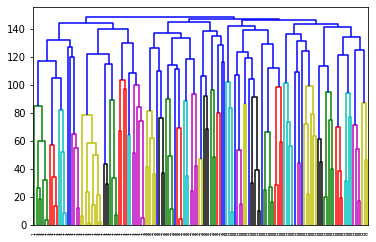

In [22]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plot
def plot_dendrogram(model, **kwargs):
    children = model.children_
    distance = np.arange(children.shape[0])
    no_of_observations = np.arange(2, children.shape[0] + 2)
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    dendrogram(linkage_matrix, **kwargs)
plot_dendrogram(agglom, labels = agglom.labels_)

## 1.3 Density-based models
### 1.3.1 DBSCAN
For each point in the dataset DBSCAN forms an n-dimmensional

### Advantages:
- no need to specify the numbers of clusters beforehand
- great at separating clusters of high density versus clusters of low density
- handles clusters well

### Disavantages:
-


### Process
- Density-based Special Clustering of Application with Noise
- Groups together points that are closely packed together.
- You dont need to specify the number of clusters beforehand
- Marks points that lie alone in low-density regions as outliers

In [24]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = .5).fit(features)
set(dbscan.labels_)

{-1, 0, 1}

In [25]:
df['dbscan'] = pd.factorize(dbscan.labels_)[0]
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species_id,kmeans,agglom,dbscan
145,6.7,3.0,5.2,2.3,2,2,2,2
146,6.3,2.5,5.0,1.9,2,1,1,2
147,6.5,3.0,5.2,2.0,2,2,2,2
148,6.2,3.4,5.4,2.3,2,2,2,2
149,5.9,3.0,5.1,1.8,2,1,1,2


In [26]:
df['dbscan'].value_counts(sort = True)

2    84
0    49
1    17
Name: dbscan, dtype: int64

# 1.5 Probabilistic Models
## 1.5.1 `GaussianMixture`

- Assumes that the data are a mix of clusters whose values are normally distributed (Gaussian)
- Distributions are reffereed as components
- Uses Bayesian inference to soft assign each obvservation to a component
- Each data point can be assigned to several components (with different probabilities)

### Advantages:
- Handles multimodal data well

In [27]:
from sklearn.mixture import GaussianMixture

gmix = GaussianMixture(n_components=3).fit(features)
df['gmix'] = pd.factorize(gmix.predict(features))[0] # not labels_

df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species_id,kmeans,agglom,dbscan,gmix
145,6.7,3.0,5.2,2.3,2,2,2,2,2
146,6.3,2.5,5.0,1.9,2,1,1,2,2
147,6.5,3.0,5.2,2.0,2,2,2,2,2
148,6.2,3.4,5.4,2.3,2,2,2,2,2
149,5.9,3.0,5.1,1.8,2,1,1,2,2


In [28]:
df['gmix'].value_counts(sort = True)

2    55
0    50
1    45
Name: gmix, dtype: int64

# 1.6 Model Evaluation

In [29]:
models = {
    'kmeans': kmeans,
    'dbscan': dbscan,
    'agglom': agglom,
    'gmix': gmix
}

for key in models.keys():
    score = (df[key]==df['species_id']).sum() / df.shape[0] * 100
    print(f"{key}:\t{round(score, 2)}%")

kmeans:	89.33%
dbscan:	63.33%
agglom:	89.33%
gmix:	96.67%


## 1.6.1 Silhoutte Coefficient
- Measures the similarity of an observation to its own cluster compared to other clusters
- Larger is better (indicates a more cohesive cluster)

In [30]:
from sklearn.metrics import silhouette_score

for key in models.keys():
    score = silhouette_score(features, df[key]) * 100
    print(f"{key}:\t{round(score, 2)}%")

kmeans:	55.28%
dbscan:	48.6%
agglom:	55.43%
gmix:	50.12%


# 1.7 Visualizing clusters

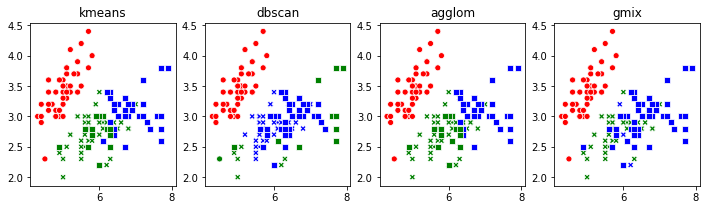

In [31]:
import matplotlib.pyplot as plt

# fig, ax = plt.subplot(1, 4, figsize = (12, 3))

# for i, in key in enumerate(models, keys()):
#     sns.scatterplot(
#         data=df,
#         x='sepal_length',
#         y='sepal_width',
#         hue=key,
#         style='species_id',
#         palette=['red', 'green', 'blue'] if key != 'dbscan' else ['red', 'green', 'blue', 'black'],
#         legend = False,
#         ax = ax[i]
#     ).set_title(key)
#     ax[i].set(xlabel = None, ylabel = None)
    
    
    
fig, ax = plt.subplots(1, 4, figsize = (12, 3))
for i, key in enumerate(models.keys()):
    sns.scatterplot(
        data = df,
        x = 'sepal_length',
        y = 'sepal_width',
        hue = key,
        style = 'species_id',
        palette = ['red', 'green', 'blue', 'black'][:len(df[key].unique())], #if key != 'dbscan' else ['red', 'green', 'blue'],
        legend = False,
        ax = ax[i]
    ).set_title(key)
    ax[i].set(xlabel = None, ylabel = None)

# 1.8 Find the optimal number of clusters

### 1.8.1 KElbowVisualizer

- Fits the model with a range of values for k
- If the line resembles an arm, then the elbow (the point of inflection on the curve) is a good indication that the underlying model fits best at that point
- Distorsion is the sum of the squared distance from each point to the center of its assigned cluster 

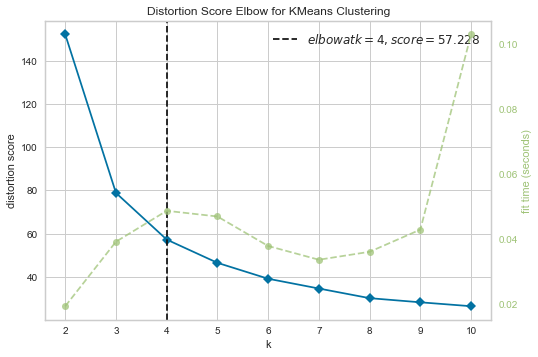

In [35]:
# features_4D = df[['sepal_lenght', 'sepal_width', 'petal_lenght', 'petal_width']]

# features_4D
features

from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(
    KMeans().fit(features),
    k = (2, 11) #range of values for k (min is 2)
)

visualizer.fit(features)
visualizer.poof()


# 1.9 t-distributed Stochastic Neighbor Embedding (t-SNE)
- Use to visualize high-dimmensional data in 2D
- Similar concept to PCA (reduces dimmensionality)
- Very complicated algorithm under the hood
- Computationally expensive;, so run PCA first if dataset has lots of features
- Perplexity relates to the number of nearest neighbors (typically between 5 and 50: larger datasets usually require a larger perplexity)

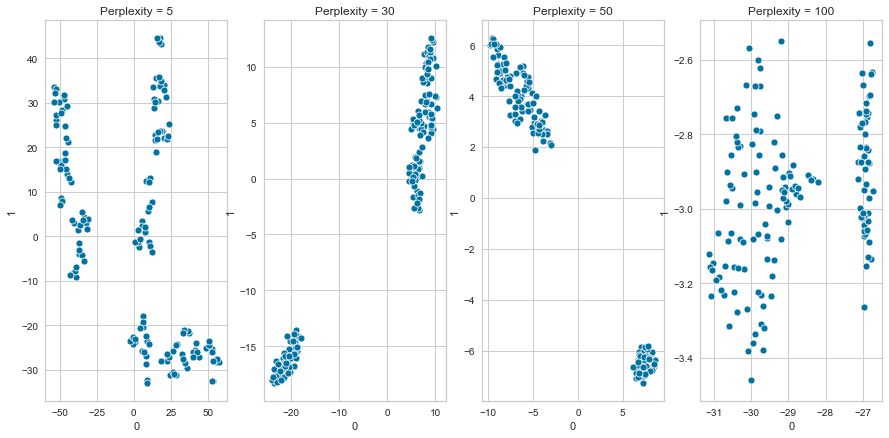

In [39]:
from sklearn.manifold import TSNE

fig, ax = plt.subplots(1, 4, figsize = (15, 7))

for i, p in enumerate([5, 30, 50, 100]):
    tsne = TSNE(perplexity=p)
    reduced = pd.DataFrame(tsne.fit_transform(
        features
    ))
    sns.scatterplot(
        data = reduced,
        x = 0,
        y = 1,
#         hue = df['species_id'],
        ax = ax[i]
    )
    ax[i].set_title(f"Perplexity = {p}")
    
plot.show()